In [145]:

import matplotlib.pyplot as plt
import cv2
from matplotlib.colors import LinearSegmentedColormap
cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red2 = LinearSegmentedColormap('Red2', cdict2)
from skimage.filters import threshold_otsu
thotsu=threshold_otsu(blur)
otsublur = blur[:,:,0]> thotsu


/Users/3kh/anaconda3/lib/python3.6/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (418, 549, 3) looks like an RGB image
  warn(msg.format(image.shape))


In [100]:
from PIL import Image
im=Image.open('cropped_Wild004.tif')
width, height=im.size

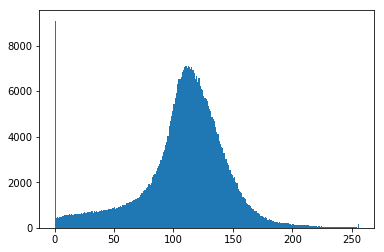

107.3591711980666

In [148]:
import numpy as np
import skimage.morphology
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild006.tif',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

np.mean(img)


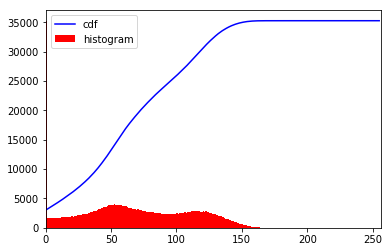

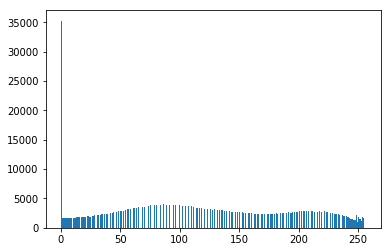

In [159]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('cropped_Wild052.tif',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.hist(img2.ravel(),256,[0,256])
plt.show()

In [160]:
equ = cv2.equalizeHist(img)

In [167]:
ablur = cv2.blur(equ,(17, 17))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,51,4) 

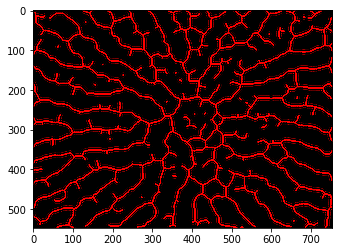

In [168]:
#ADAPTIVE SKELETON
from skimage.morphology import skeletonize
adaptiveskeleton = skeletonize(a_mthres)
ax = plt.subplot()
ax.imshow(adaptiveskeleton, cmap=red2, interpolation='sinc')

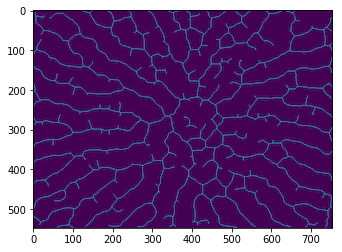

In [169]:
from skimage.morphology import remove_small_objects
cleanskel=remove_small_objects(adaptiveskeleton, min_size=50, connectivity=3)
plot = plt.subplot()
plot.imshow(cleanskel, interpolation='sinc') 

/Users/3kh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


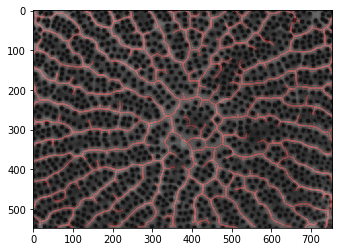

In [170]:
import matplotlib.image as mpimg
img2=mpimg.imread('cropped_Wild052.tif')
imgplot2 = plt.imshow(img2, alpha= .9)

ax2 = plt.subplot()
ax2.imshow(cleanskel, cmap=red2, interpolation='sinc', alpha=0.3) 
plt.show()

In [165]:
import skimage.measure
skimage.measure.perimeter(adaptiveskeleton)

12065.56388159051